In [1]:
# Importing needed packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report, precision_score, recall_score, accuracy_score



In [2]:
file_path = '/kaggle/input/creditcard/creditcard.csv'
credit_card = pd.read_csv(file_path)

# Understanding the data

In [3]:
credit_card.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
credit_card.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [5]:
credit_card.shape

(284807, 31)

In [6]:
credit_card.dtypes

Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object

In [7]:
credit_card['Class'].unique

<bound method Series.unique of 0         0
1         0
2         0
3         0
4         0
         ..
284802    0
284803    0
284804    0
284805    0
284806    0
Name: Class, Length: 284807, dtype: int64>

In [8]:
credit_card["Class"].value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

In [9]:
cor_values = credit_card.corr()

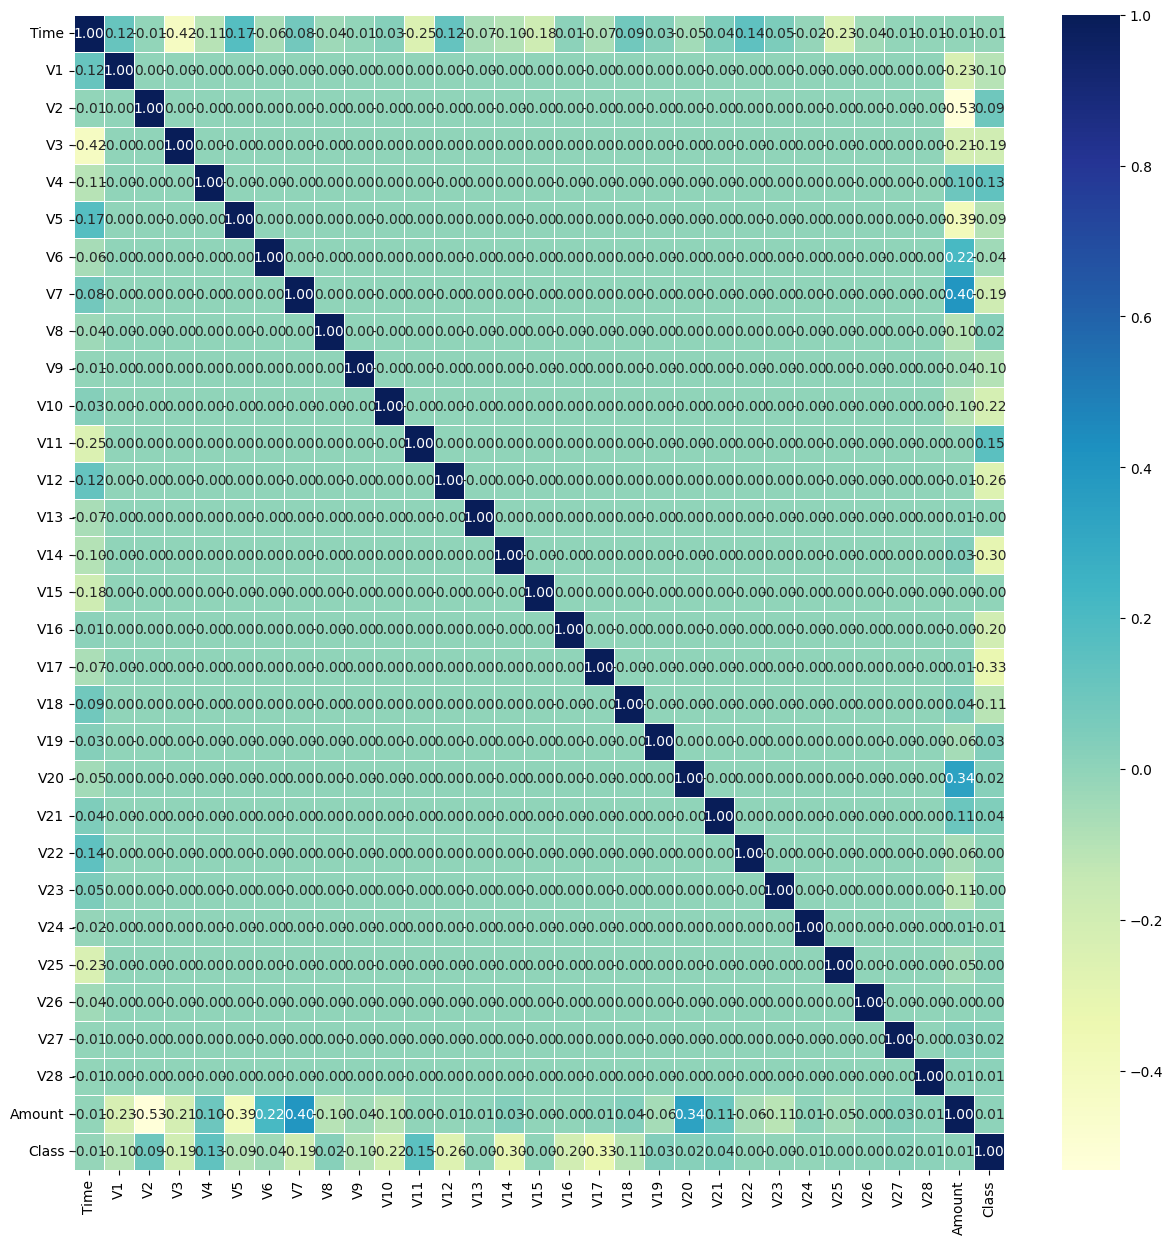

In [10]:
cor_values = credit_card.corr()
plt.figure(figsize=(15,15))
sns.heatmap(cor_values, annot=True,fmt='.2f', linewidths=0.5, cmap='YlGnBu');


In [11]:
credit_card.isna().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [12]:
credit_card.nunique

<bound method DataFrame.nunique of             Time         V1         V2        V3        V4        V5  \
0            0.0  -1.359807  -0.072781  2.536347  1.378155 -0.338321   
1            0.0   1.191857   0.266151  0.166480  0.448154  0.060018   
2            1.0  -1.358354  -1.340163  1.773209  0.379780 -0.503198   
3            1.0  -0.966272  -0.185226  1.792993 -0.863291 -0.010309   
4            2.0  -1.158233   0.877737  1.548718  0.403034 -0.407193   
...          ...        ...        ...       ...       ...       ...   
284802  172786.0 -11.881118  10.071785 -9.834783 -2.066656 -5.364473   
284803  172787.0  -0.732789  -0.055080  2.035030 -0.738589  0.868229   
284804  172788.0   1.919565  -0.301254 -3.249640 -0.557828  2.630515   
284805  172788.0  -0.240440   0.530483  0.702510  0.689799 -0.377961   
284806  172792.0  -0.533413  -0.189733  0.703337 -0.506271 -0.012546   

              V6        V7        V8        V9  ...       V21       V22  \
0       0.462388  0.23959

In [13]:
# Getting features and label ready (X,y)
X = credit_card.drop('Class', axis=1)
y = credit_card['Class']

In [14]:
# Splitting data into train and test
np.random.seed(42)
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)


In [15]:
# instanciating model
np.random.seed(42)
clf = RandomForestClassifier()
clf.fit(X_train,y_train)

RandomForestClassifier()

In [16]:
# Making prediction
y_preds = clf.predict(X_test)

In [17]:
# Evaluate model using using classification_report, confusion_matrix, 
print(confusion_matrix(y_test, y_preds))
print(classification_report(y_test, y_preds))
print(accuracy_score(y_test, y_preds))

[[56862     2]
 [   23    75]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.97      0.77      0.86        98

    accuracy                           1.00     56962
   macro avg       0.99      0.88      0.93     56962
weighted avg       1.00      1.00      1.00     56962

0.9995611109160493


In [18]:
## using Logistics Regressor
from sklearn.linear_model import LogisticRegression

In [19]:
# getting data ready

np.random.seed(42)

X = credit_card.drop('Class', axis=1)
y = credit_card['Class']

# Splitting data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [21]:
# Instanciating the model
np.random.seed(42)

model = LogisticRegression(max_iter=500)
model.fit(X_train, y_train);

In [22]:
# Evaluating the model
np.random.seed(42)

lr_y_preds = model.predict(X_test)
print("LogisticRegression")
print(f"Precision Score: {precision_score(y_test, lr_y_preds)*100:.2f}%")
print(f" Recal Score: {recall_score(y_test, lr_y_preds)*100:.2f}%")
print(f" Accuracy score is: {accuracy_score(y_test, lr_y_preds)*100:.2f}%")

LogisticRegression
Precision Score: 78.69%
 Recal Score: 48.98%
 Accuracy score is: 99.89%


In [23]:
print("Ensemble: RandomForestClassifier")
print(f"Precision Score: {precision_score(y_test, y_preds)*100:.2f}%")
print(f" Recal Score: {recall_score(y_test, y_preds)*100:.2f}%")
print(f" Accuracy score is: {accuracy_score(y_test, y_preds)*100:.2f}%")

Ensemble: RandomForestClassifier
Precision Score: 97.40%
 Recal Score: 76.53%
 Accuracy score is: 99.96%


In [24]:
# using XGBClassifier

from xgboost import XGBClassifier

In [25]:
np.random.seed(42)
X = credit_card.drop('Class', axis=1)
y = credit_card['Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# instanciate model
clf_2 = XGBClassifier()
clf_2.fit(X_train, y_train)
xg_y_preds = clf_2.predict(X_test)

In [26]:
print("XGBClassifier")
print(f"Precision Score: {precision_score(y_test, xg_y_preds)*100:.2f}%")
print(f" Recal Score: {recall_score(y_test, xg_y_preds)*100:.2f}%")
print(f" Accuracy score is: {accuracy_score(y_test, xg_y_preds)*100:.2f}%")

XGBClassifier
Precision Score: 96.20%
 Recal Score: 77.55%
 Accuracy score is: 99.96%


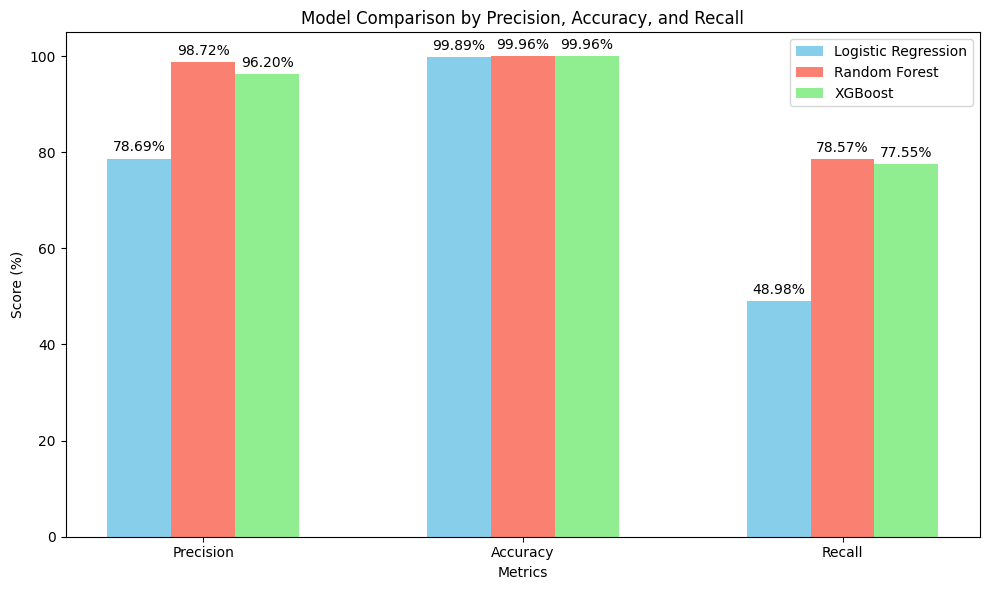

In [27]:
import matplotlib.pyplot as plt
import numpy as np

# Define the metrics for each model
metrics = ['Precision', 'Accuracy', 'Recall']
logistic_scores = [78.69, 99.89, 48.98]
random_forest_scores = [98.72, 99.96, 78.57]
xgboost_scores = [96.20, 99.96, 77.55]

# Set the position of bars on the x-axis
x = np.arange(len(metrics))
width = 0.2  # Width of each bar

# Create the bar plots
fig, ax = plt.subplots(figsize=(10, 6))
bars1 = ax.bar(x - width, logistic_scores, width, label='Logistic Regression', color='skyblue')
bars2 = ax.bar(x, random_forest_scores, width, label='Random Forest', color='salmon')
bars3 = ax.bar(x + width, xgboost_scores, width, label='XGBoost', color='lightgreen')

# Add labels and title
ax.set_xlabel('Metrics')
ax.set_ylabel('Score (%)')
ax.set_title('Model Comparison by Precision, Accuracy, and Recall')
ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.legend()

# Add values on top of each bar
def add_labels(bars):
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.2f}%', 
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # Offset label position above the bar
                    textcoords="offset points",
                    ha='center', va='bottom')

add_labels(bars1)
add_labels(bars2)
add_labels(bars3)

plt.tight_layout()
plt.show()
